# Visualizing

Ok, now that we know how to make a lens system of our choosing, lets spend some time actually looking at what is going on. 

In [1]:
%matplotlib notebook
import sys
sys.path.append("../")
from ripple.lens import SIE_Lens
from ripple.source import Gaussian_Source
from ripple.plane import ImagePlane, LensPlane, SourcePlane
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["image.cmap"] = "inferno"
import numpy as np

## Caustics and critical lines

The simplest way to visualize what is going on with a lens system is to include the caustics and critical lines. Ripple has built in plotting functions for these, simply pass the lens plane and axis object to the functions and they will add the lines to the plot. Blue is caustics and red is critical lines. You can pass extra parameters to the functions in order to control the plotting behaviour.

In [2]:
from ripple.plot import critical_lines, caustics

<IPython.core.display.Javascript object>


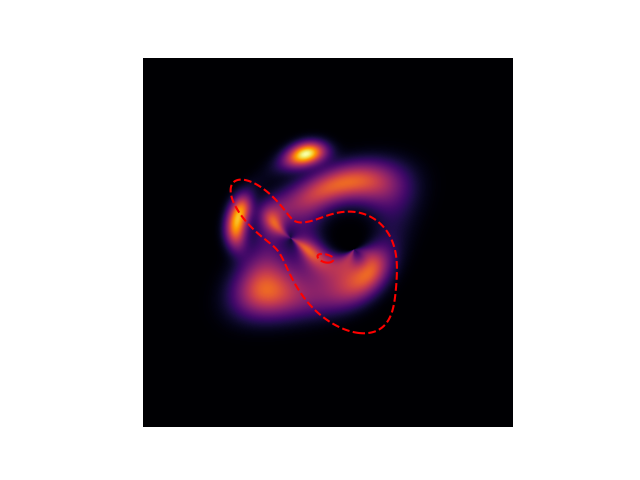

In [3]:
SIE1 = SIE_Lens(x0 = -1, y0 = 0.1, q = 0.5, pa = -np.pi/4, core = 0.)
SIE2 = SIE_Lens(x0 = 0.7, y0 = -0.2)
GS1 = Gaussian_Source(x0 = -0.1, y0 = -0.1, q = 0.5, pa = np.pi/3, sigma = 0.3)
GS2 = Gaussian_Source(x0 = -0.7, y0 = 0.7, sigma = 0.2)

IP = ImagePlane(shape = (1000,1000), fov = 10)
LP = LensPlane([SIE1, SIE2])
SP = SourcePlane([GS1, GS2])

fig, ax = plt.subplots()
ax.imshow(IP.image(LP, SP), extent = IP.plt_extent, origin = "lower")
critical_lines(LP, ax)
#caustics(LP, ax)
ax.axis("off")
plt.show()

## Viewing individual planes

While it is quite straightforward, another way to get a sense of the lensing system is to view the individual planes involved one at a time. Lets look at the lens plane and see what is going on. Using the built in functions is very simple, though they are really just meant for quick diagnostics.Note that the kappa map is shown in log scale and the gamma maps are shown with arctan scaling.

In [4]:
from ripple.plot import lens_potential, lens_kappa, lens_alpha, lens_gamma

<IPython.core.display.Javascript object>


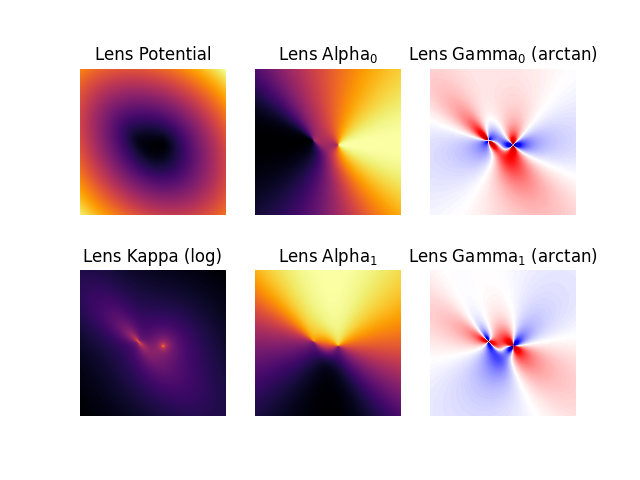

In [5]:
fig, axarr = plt.subplots(2,3)
lens_potential(LP, axarr[0][0])
lens_kappa(LP, axarr[1][0])
lens_alpha(LP, axarr[0][1], axarr[1][1])
lens_gamma(LP, axarr[0][2], axarr[1][2])
for ax in axarr.ravel():
    ax.axis("off")
plt.show()

Now lets look at the source image. There isn't anything special here, the source image simply shows the light at is would have reached us with no lens.

In [6]:
from ripple.plot import source_distribution

<IPython.core.display.Javascript object>


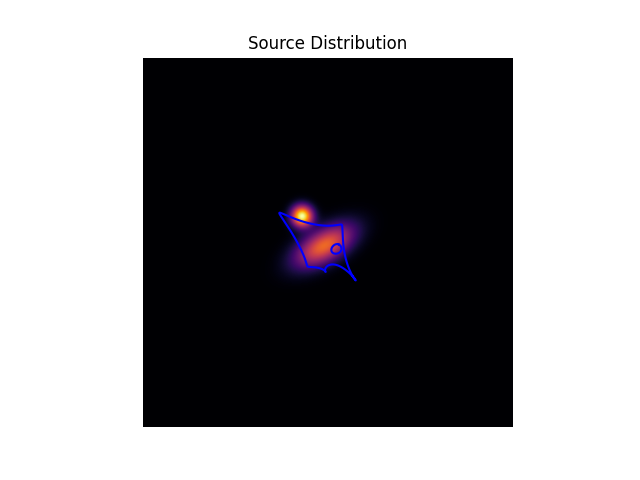

In [7]:
fig, ax = plt.subplots()
source_distribution(SP, ax)
caustics(LP, ax)
ax.axis("off")
plt.show()

## Rays in 3D

A lensing system is ultimately a 3D system, sometimes it helps to look at it in 3D to see what is going on. 

In [8]:
from mpl_toolkits import mplot3d

<IPython.core.display.Javascript object>


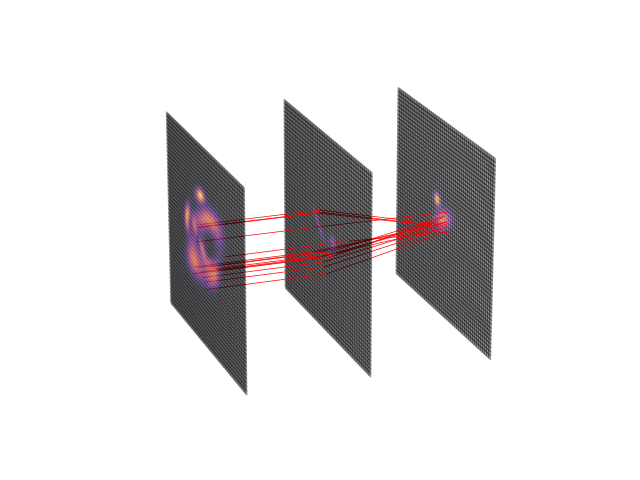

In [10]:
fig = plt.figure()
ax = plt.axes(projection='3d')
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.resizable = True

image = IP.image(LP, SP)
image /= np.sum(image)
N = 15

# Sample randomly from the image, w probability proportional to the brightness
flat = image.flatten()
samples = np.random.choice(a=flat.size, p=flat, size = N)

# Take this index and adjust it so it matches the original array
samplesY, samplesX = np.unravel_index(samples, image.shape)
samplesX = (samplesX - (image.shape[0]-1)/2) * IP.pixelscale[0]
samplesY = (samplesY - (image.shape[1]-1)/2) * IP.pixelscale[1]

alpha = LP.alpha(samplesX, samplesY)
finalX = samplesX - alpha[0]
finalY = samplesY - alpha[1]

surface_kwargs = {"shade": True, "alpha": 0.3}
ax.plot_surface(IP.XX, np.zeros(image.shape), IP.YY, facecolors = mpl.cm.inferno(image/np.max(image)), zorder = 5, **surface_kwargs)
kappa = np.log10(LP.kappa(IP.XX, IP.YY))
ax.plot_surface(IP.XX, np.zeros(image.shape)+1, IP.YY, facecolors = mpl.cm.inferno(kappa/np.max(kappa)), zorder = 3, **surface_kwargs)
source = SP(IP.XX, IP.YY)
ax.plot_surface(IP.XX, np.zeros(image.shape)+2, IP.YY, facecolors = mpl.cm.inferno(source/np.max(source)), zorder = 1, **surface_kwargs)
for i in range(N):
    ax.plot3D([samplesX[i],samplesX[i]], [0,1],[samplesY[i],samplesY[i]], color = "r", linewidth = 0.5, zorder = 4)
    ax.plot3D([samplesX[i],finalX[i]], [1,2],[samplesY[i],finalY[i]], color = "r", linewidth = 0.5, zorder = 3)
ax.axis("off")
plt.tight_layout()
ax.view_init(20, -20)
plt.show()